# Data Inspection

In [1]:
import pandas as pd
data = pd.read_csv('Turbine_Data.csv')

In [2]:
df = data.copy()
df.tail()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [3]:
df.shape

(118224, 22)

In [4]:
df.isnull().sum()

Unnamed: 0                          0
ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [5]:
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]
print(single_value_columns)

['ControlBoxTemperature', 'WTG']


In [6]:
# borro columnas con un solo valor
df.drop(columns=single_value_columns, inplace=True)

In [7]:

df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df['index'] = pd.to_datetime(df['index'])

In [8]:
df.columns

Index(['index', 'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WindDirection',
       'WindSpeed'],
      dtype='object')

Correlation Matrix:
                               ActivePower  AmbientTemperatue  \
ActivePower                      1.000000          -0.065637   
AmbientTemperatue               -0.065637           1.000000   
BearingShaftTemperature          0.655400           0.246505   
Blade1PitchAngle                -0.368997           0.085461   
Blade2PitchAngle                -0.367978           0.090904   
Blade3PitchAngle                -0.367978           0.090904   
GearboxBearingTemperature        0.818850           0.017216   
GearboxOilTemperature            0.821921           0.162511   
GeneratorRPM                     0.849604          -0.130123   
GeneratorWinding1Temperature     0.931390           0.077859   
GeneratorWinding2Temperature     0.932521           0.078736   
HubTemperature                   0.347363           0.589729   
MainBoxTemperature               0.101627           0.836539   
NacellePosition                  0.028108          -0.037498   
ReactivePower      

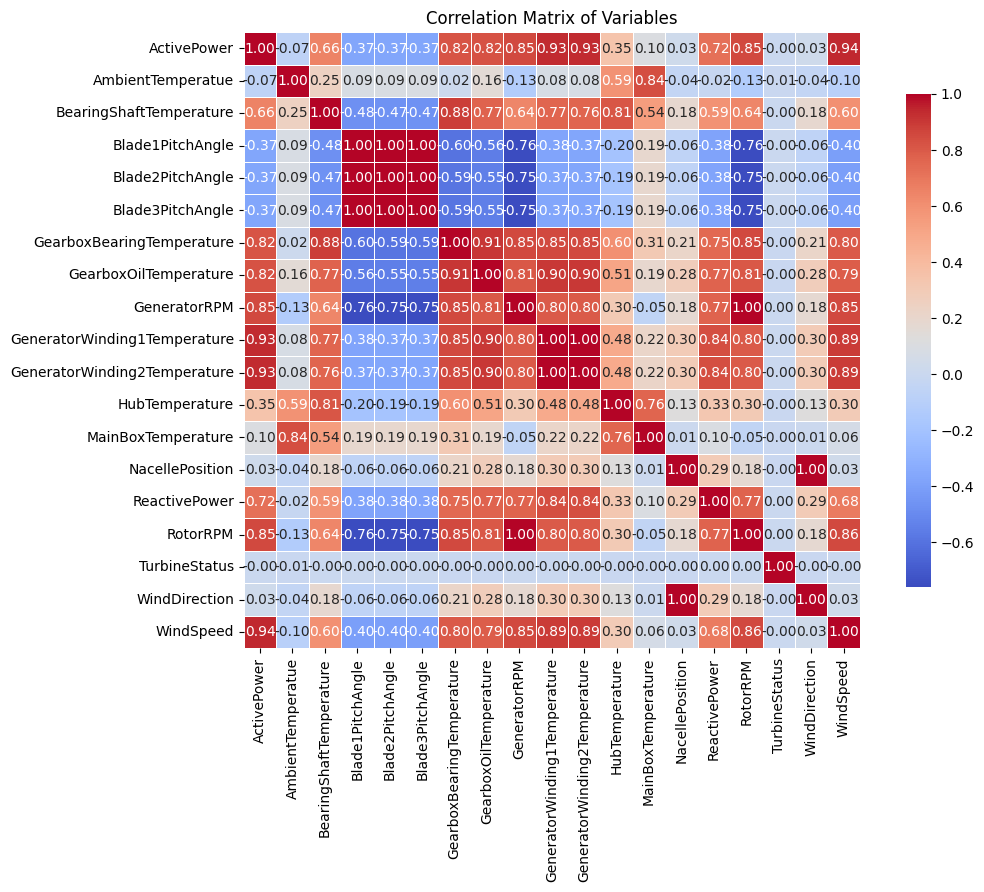

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned = df[df.drop(columns='index').notna().sum(axis=1) > 0]
correlation_matrix = df_cleaned.drop(columns='index').corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Set up the matplotlib figure
# This line sets the size of the figure for better visibility.
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
# 'annot=True' will display the correlation coefficients on the heatmap.
# 'cmap' specifies the color map, and 'fmt' is used to format the annotation text.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix of Variables')

# Show the plot
plt.show()


In [10]:
df.columns


Index(['index', 'ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WindDirection',
       'WindSpeed'],
      dtype='object')

In [11]:

# I delete columns with 99% or more correlation with other columns
df.drop(columns=['Blade2PitchAngle','Blade3PitchAngle', 'GeneratorRPM', 'GeneratorWinding2Temperature' ], inplace=True)


In [12]:
# I delete columns that have nothing to do with ActivePower

df.drop(columns=['WindDirection', 'TurbineStatus', 'AmbientTemperatue', 'NacellePosition'], inplace=True)

In [13]:
df.columns

Index(['index', 'ActivePower', 'BearingShaftTemperature', 'Blade1PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature',
       'GeneratorWinding1Temperature', 'HubTemperature', 'MainBoxTemperature',
       'ReactivePower', 'RotorRPM', 'WindSpeed'],
      dtype='object')

In [14]:
df.set_index('index', inplace=True)

# Missing Values

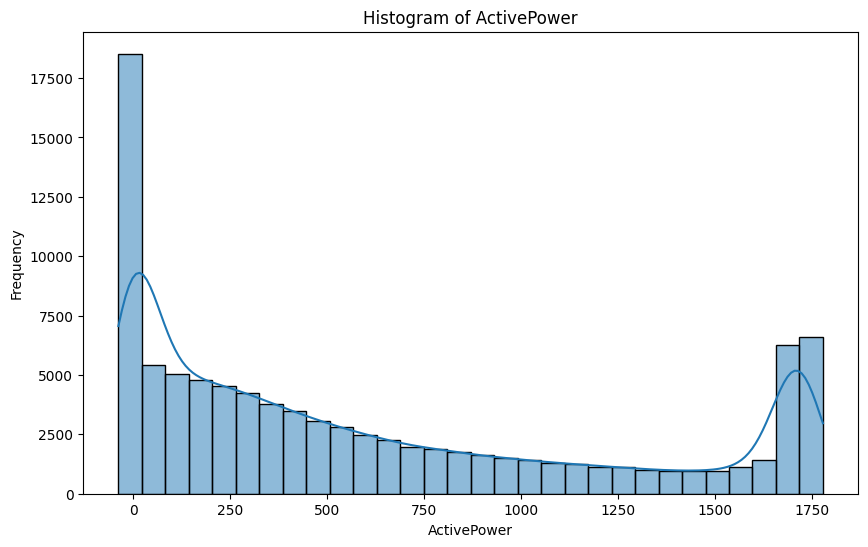

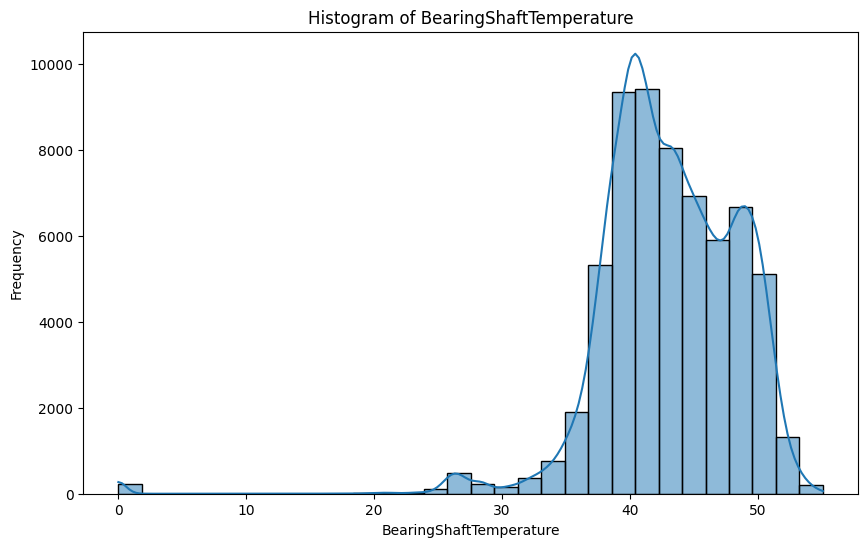

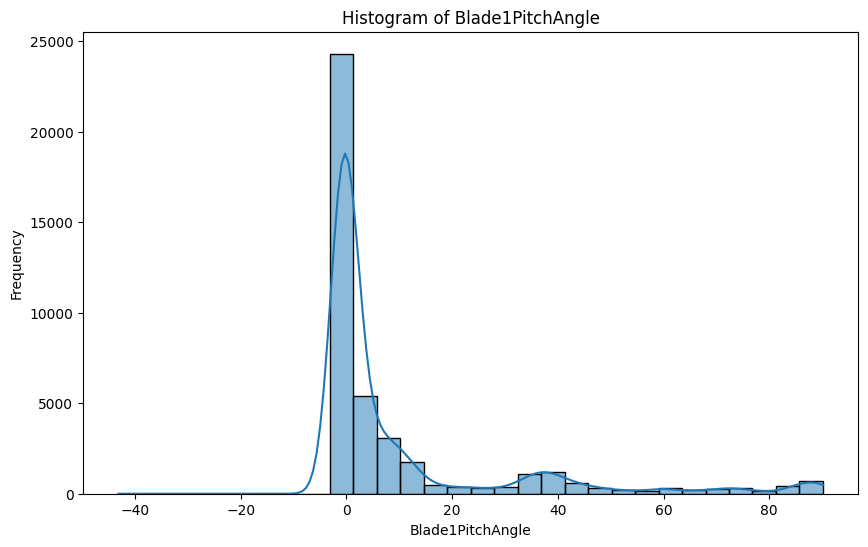

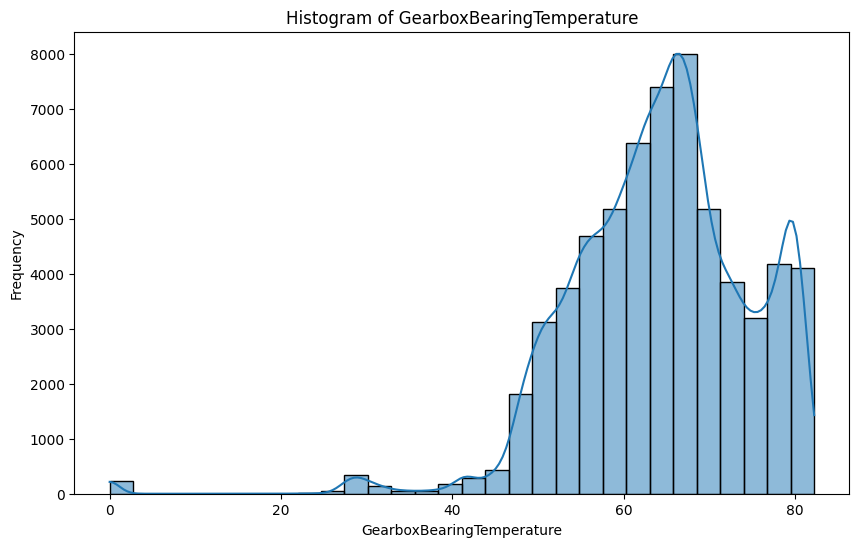

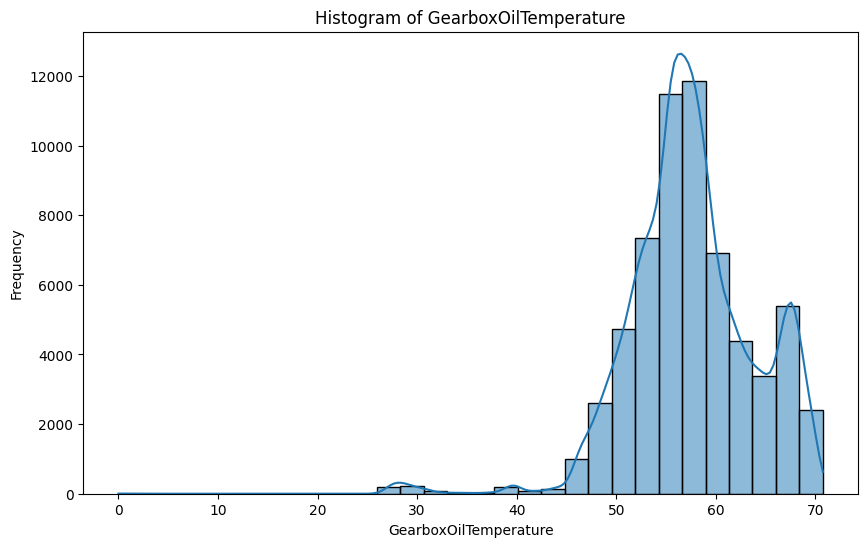

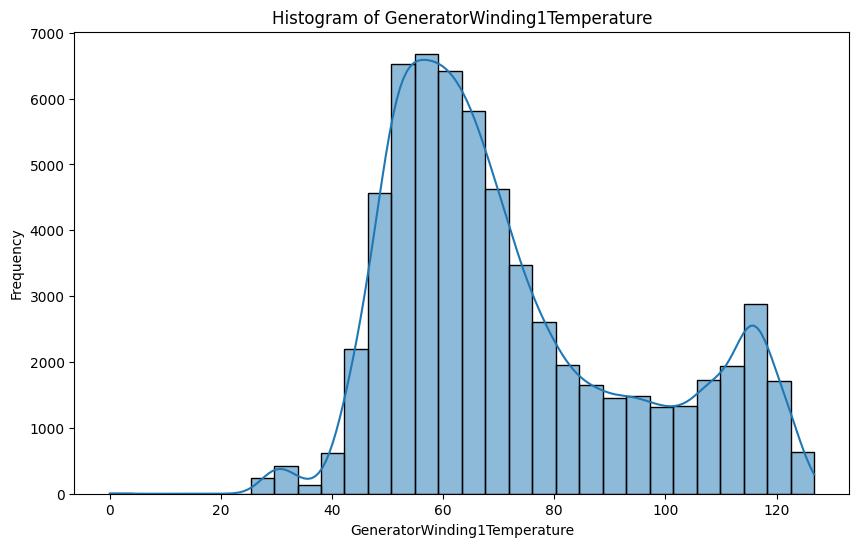

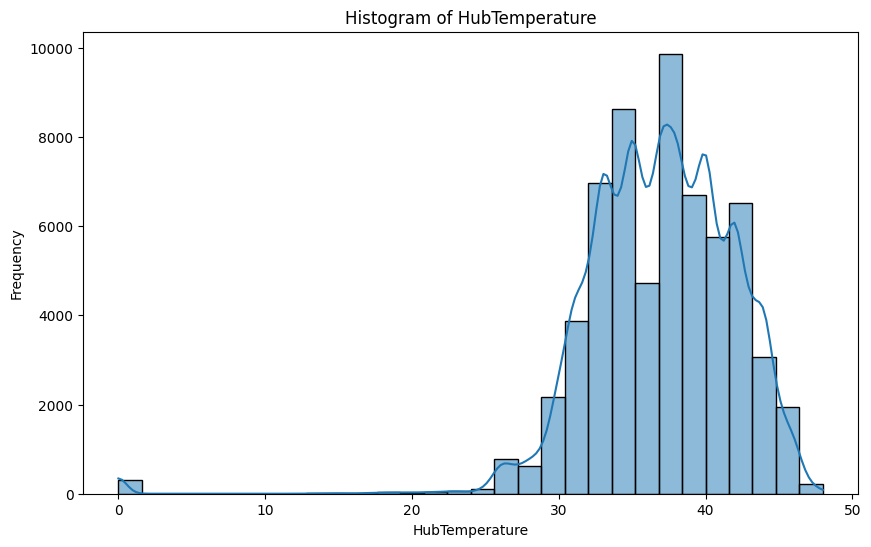

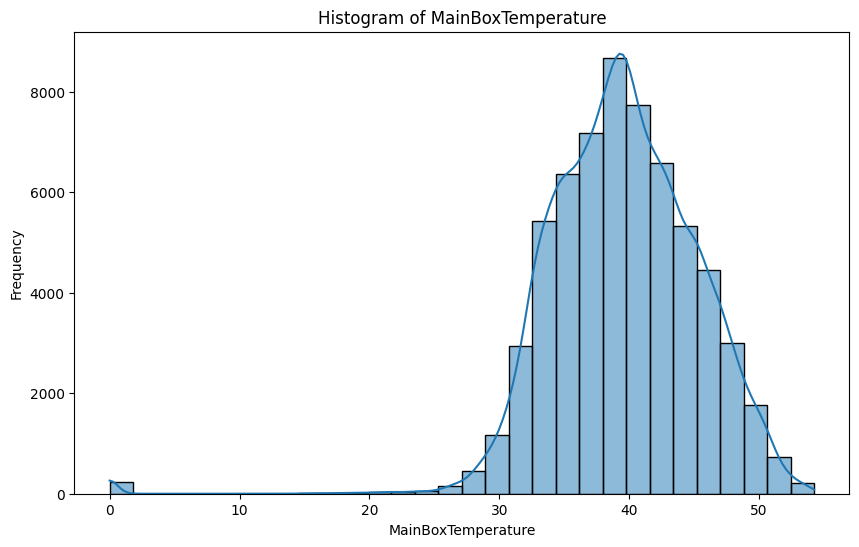

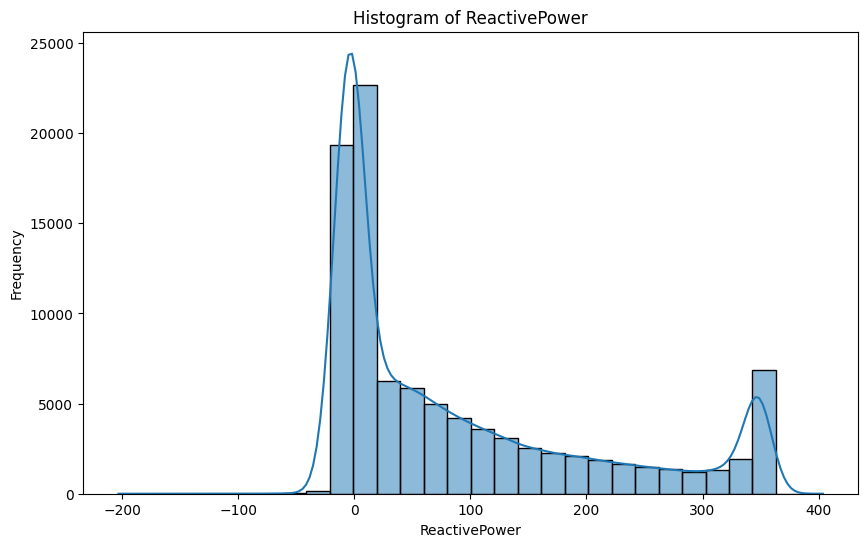

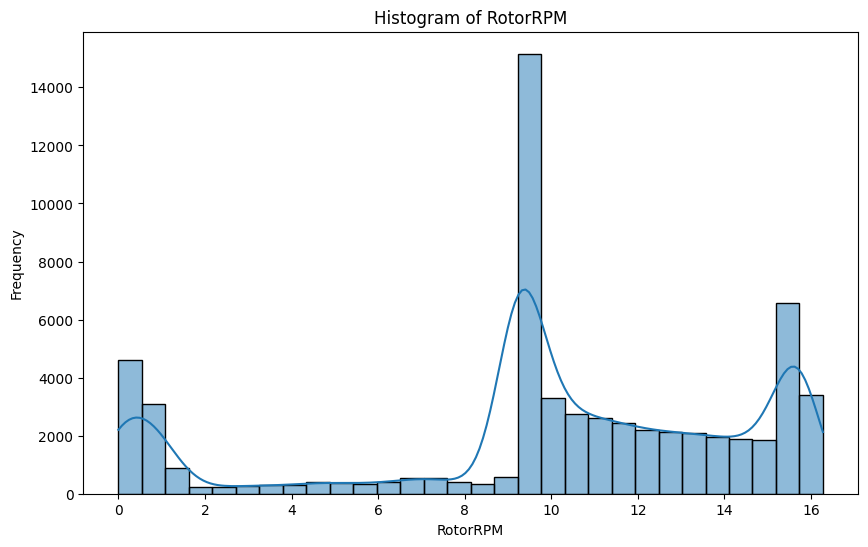

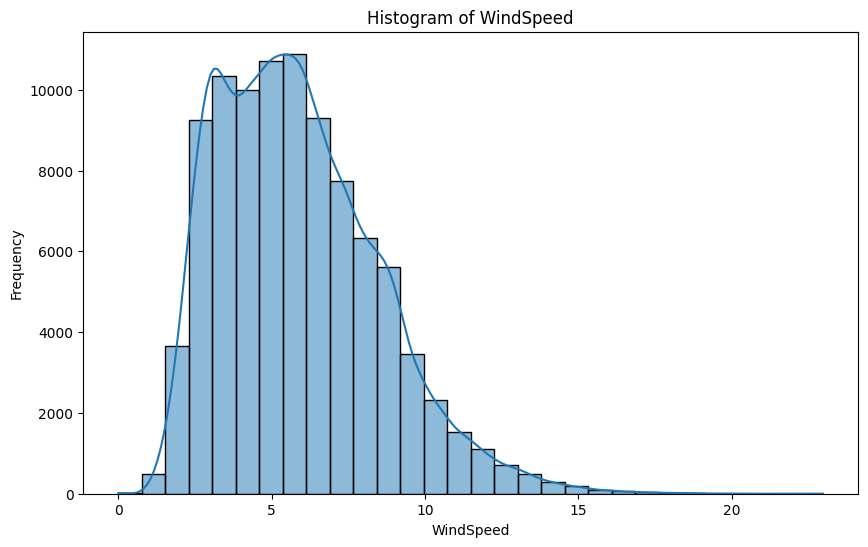

In [15]:
# I will see the histogram of the ActivePower
Variable = [ 'ActivePower', 'BearingShaftTemperature', 'Blade1PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature',
       'GeneratorWinding1Temperature', 
       'HubTemperature', 'MainBoxTemperature', 'ReactivePower', 'RotorRPM',
       'WindSpeed']

for var in Variable:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], bins=30, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


# Filling null values

In [16]:
# I delete rows of ActivePower that are null

df = df[df['ActivePower'].notna()]


In [17]:
# For RotorRPM, since it has a high correlation with active power, KNNImputer will be used to fill in the missing values

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['RotorRPM'] = imputer.fit_transform(df[['RotorRPM']])


In [18]:
# For ReactivePower, since it has a high correlation with active power, KNNImputer will be used to fill in the missing values

df['ReactivePower'] = imputer.fit_transform(df[['ReactivePower']])


In [19]:
df['GearboxOilTemperature'] = imputer.fit_transform(df[['GearboxOilTemperature']])

In [20]:

# I will use forward fill to fill the missing values in WindSpeed
df['WindSpeed'].fillna(method='ffill', inplace=True)


/var/folders/y5/26w5cdyn4pv3z5_x5_d884vh0000gn/T/ipykernel_21494/2799002565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindSpeed'].fillna(method='ffill', inplace=True)
/var/folders/y5/26w5cdyn4pv3z5_x5_d884vh0000gn/T/ipykernel_21494/2799002565.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['WindSpeed'].fillna(method='ffill', inplace=True)


In [21]:
# I apply the mean for: BearingShaftTemperature, Blade1PitchAngle, GearboxBearingTemperature, GeneratorWinding1Temperature, HubTemperature, MainBoxTemperature

for col in ['BearingShaftTemperature', 'Blade1PitchAngle', 'GearboxBearingTemperature',
            'GeneratorWinding1Temperature', 'HubTemperature', 'MainBoxTemperature']:
    df[col].fillna(df[col].mean(), inplace=True)



/var/folders/y5/26w5cdyn4pv3z5_x5_d884vh0000gn/T/ipykernel_21494/3876447816.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [22]:
df.isnull().sum()

ActivePower                     0
BearingShaftTemperature         0
Blade1PitchAngle                0
GearboxBearingTemperature       0
GearboxOilTemperature           0
GeneratorWinding1Temperature    0
HubTemperature                  0
MainBoxTemperature              0
ReactivePower                   0
RotorRPM                        0
WindSpeed                       0
dtype: int64

In [23]:
df.shape

(94750, 11)

# Train 

In [24]:
# I separate into train and test by chronological order using 80% of the data for train and the remaining 20% for test

train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]
train.shape, test.shape

((75800, 11), (18950, 11))

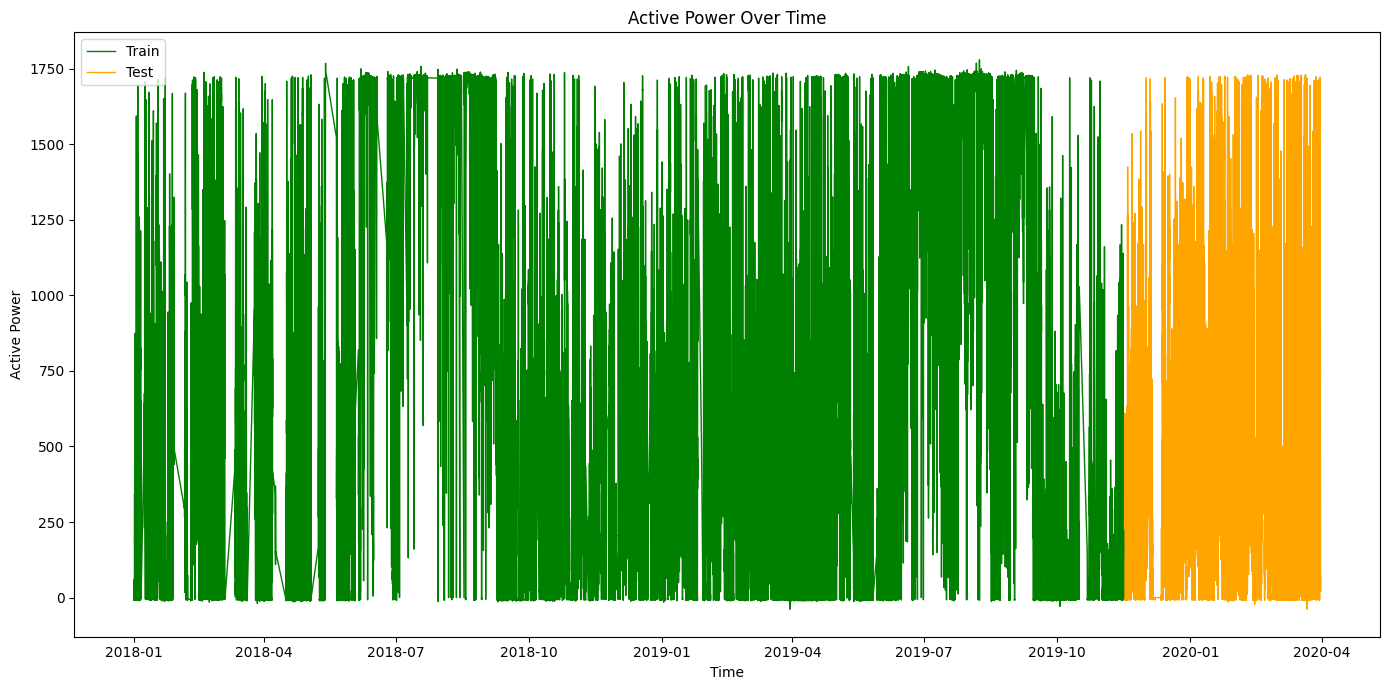

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot train and test data
plt.plot(train.index, train['ActivePower'], label='Train', color='green', linewidth=1)
plt.plot(test.index, test['ActivePower'], label='Test', color='orange', linewidth=1)

plt.title('Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Active Power')
plt.legend()

# Asegura que todas las fechas se usen sin autoajustes raros
plt.tight_layout()
plt.show()

# Predictions

In [26]:
# I will try with the Random Forest model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# I define the features and the target variable
X_train = train.drop(columns=['ActivePower'])
y_train = train['ActivePower']

X_test = test.drop(columns=['ActivePower'])
y_test = test['ActivePower']
# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 10745.234318497021


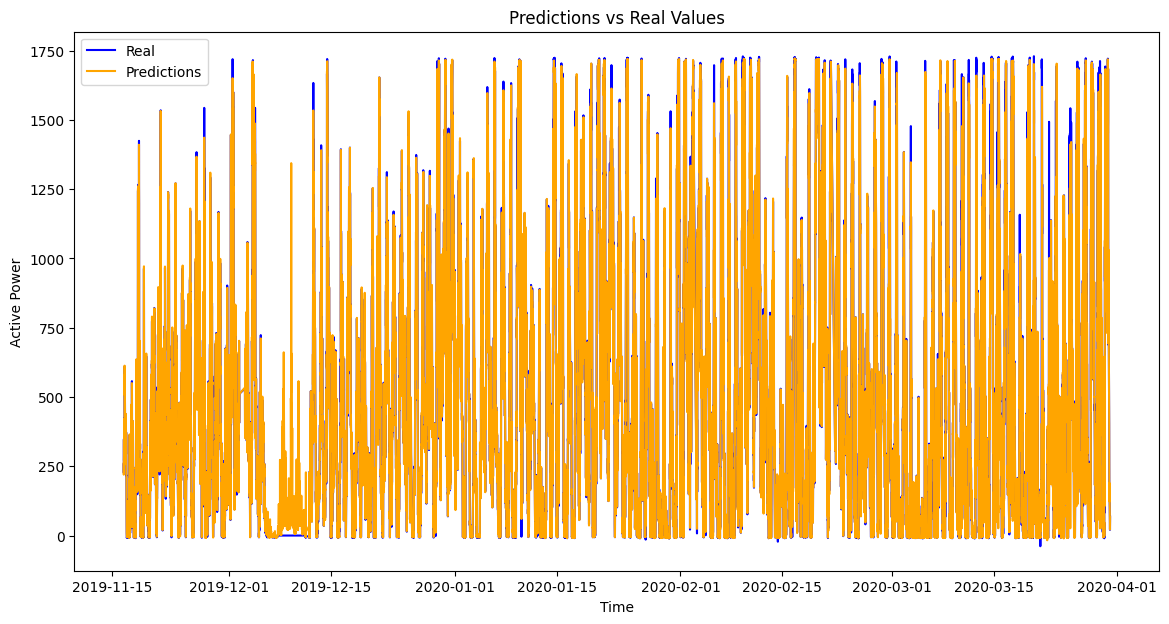

In [27]:
# I plot the predictions vs the real values

plt.figure(figsize=(14, 7))
plt.plot(test.index, y_test, label='Real', color='blue')
plt.plot(test.index, predictions, label='Predictions', color='orange')
plt.title('Predictions vs Real Values')
plt.xlabel('Time')
plt.ylabel('Active Power')
plt.legend()
plt.show()

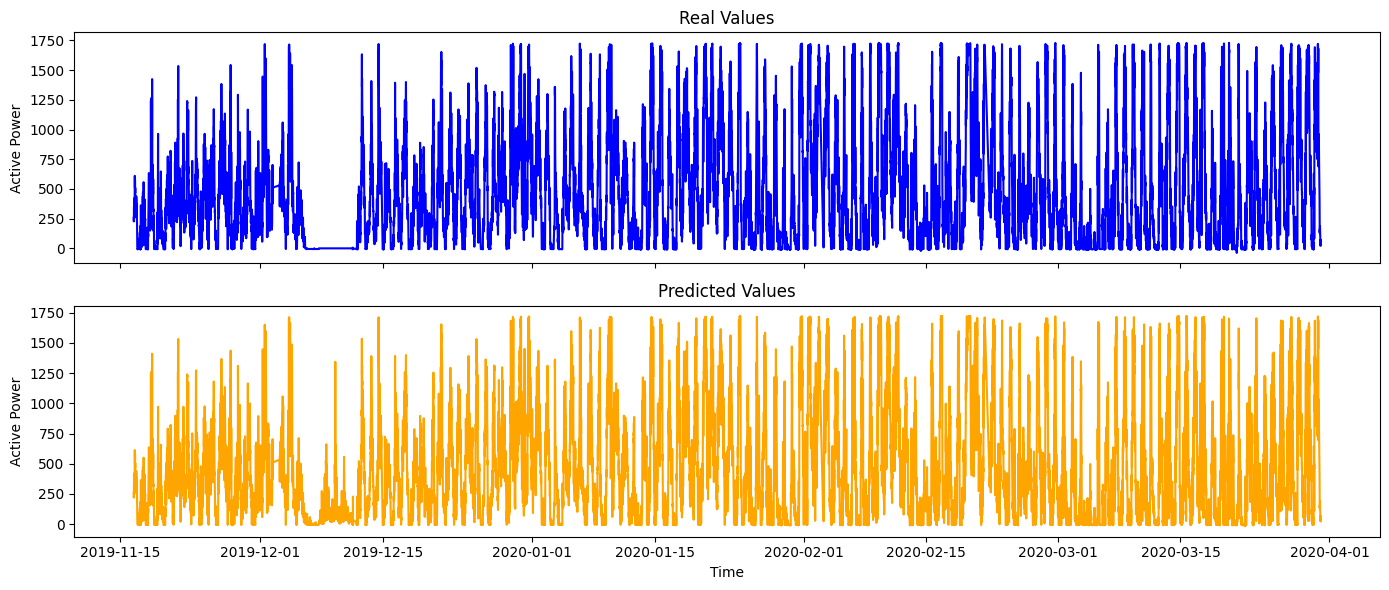

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# Gráfico 1: Valores reales
axs[0].plot(test.index, y_test, color='blue')
axs[0].set_title('Real Values')
axs[0].set_ylabel('Active Power')

# Gráfico 2: Predicciones
axs[1].plot(test.index, predictions, color='orange')
axs[1].set_title('Predicted Values')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Active Power')

plt.tight_layout()
plt.show()

In [29]:
# now I will calculate the Mean Absolute Error (MAE) to evaluate the model's performance
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 19.73771334902201


In [30]:
# I calculate the RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 103.65922206199032


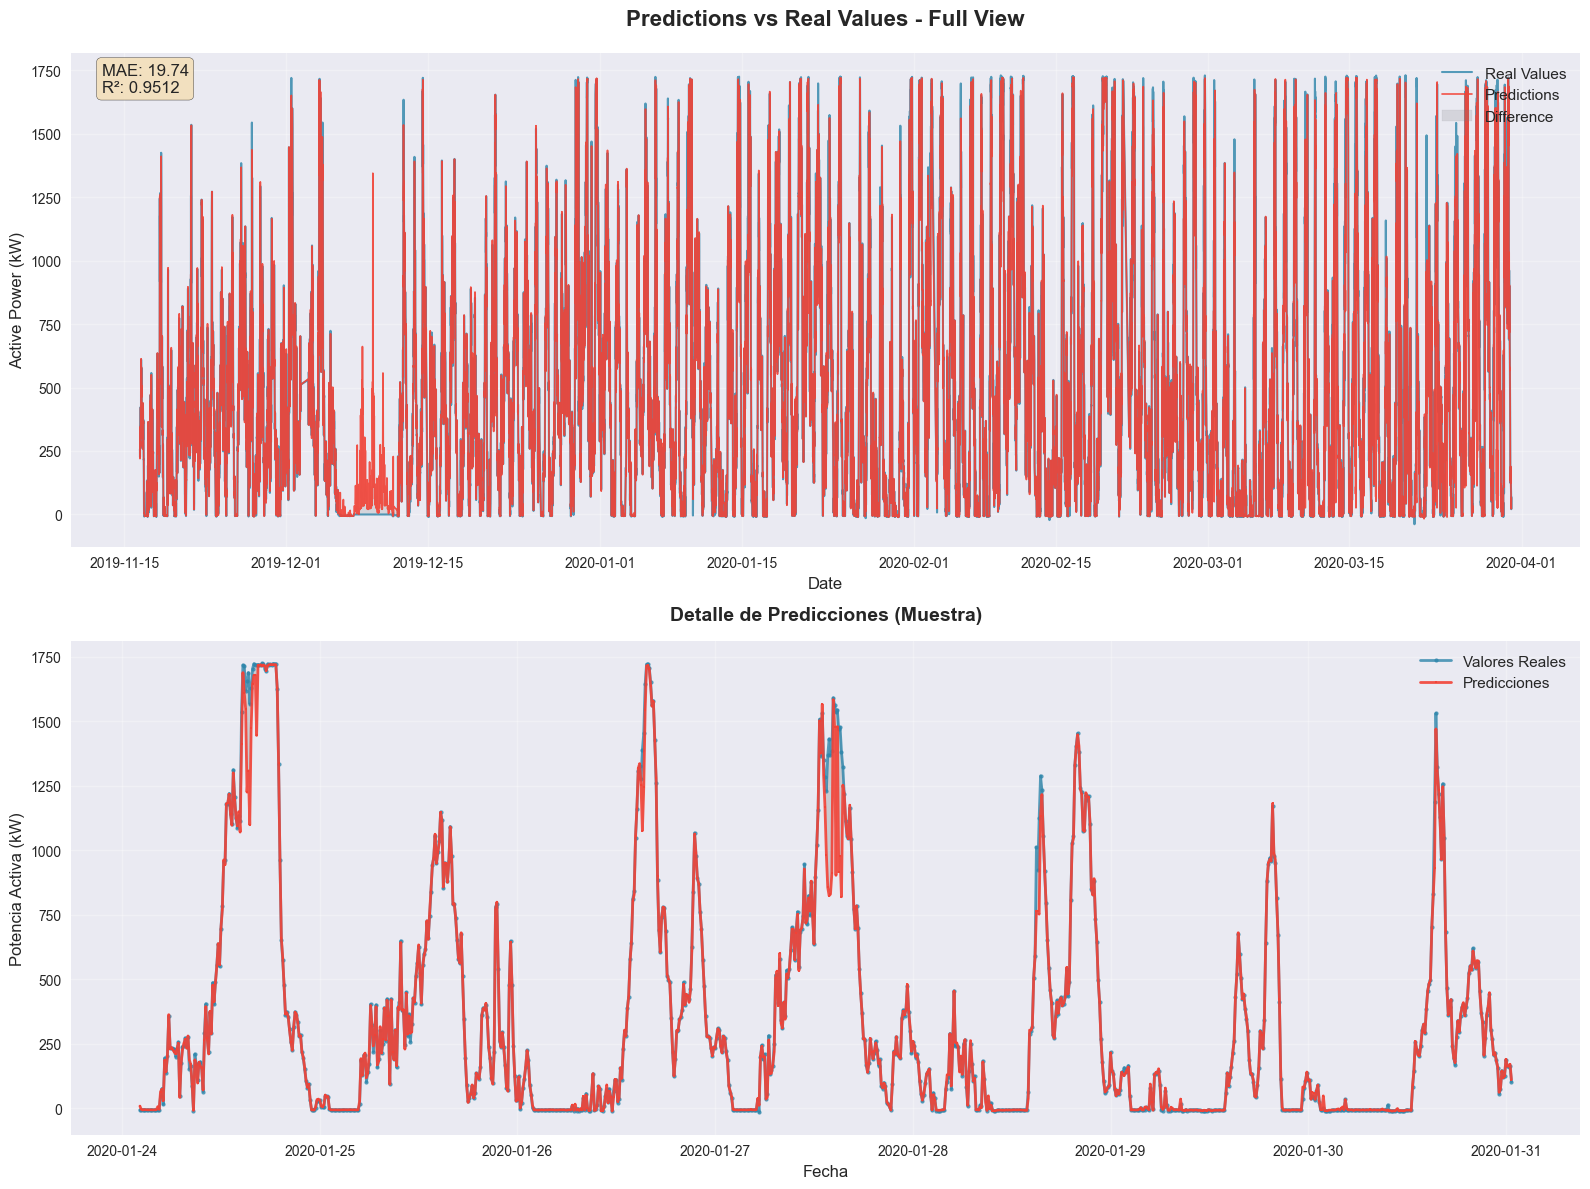

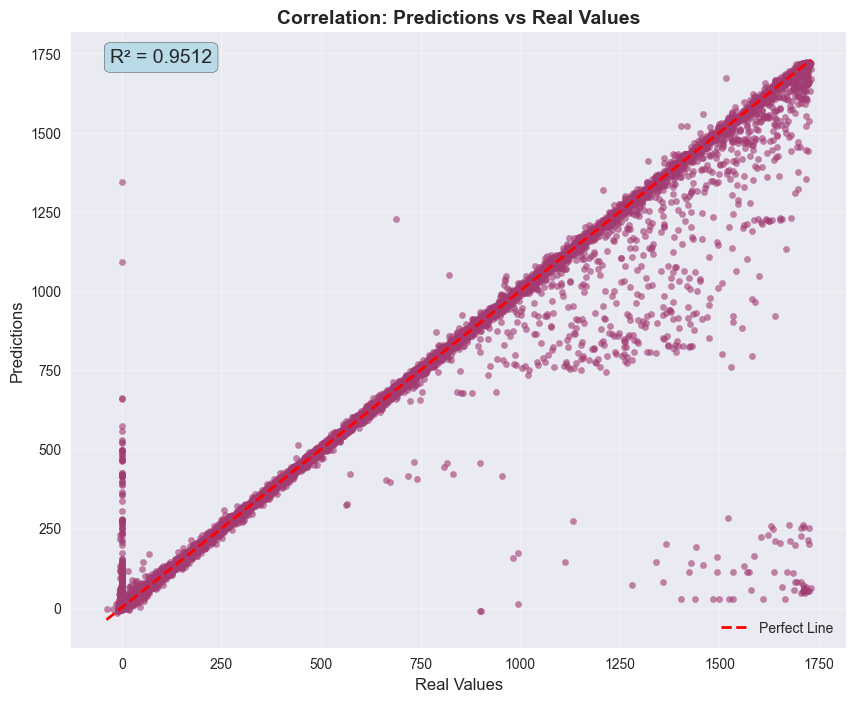

In [31]:
# Improved visualization of predictions vs real values

plt.style.use('seaborn-v0_8')  # Cleaner style
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Main plot - Full view
ax1.plot(test.index, y_test, label='Real Values', color='#2E86AB', linewidth=1.5, alpha=0.8)
ax1.plot(test.index, predictions, label='Predictions', color='#F24236', linewidth=1.2, alpha=0.9)
ax1.fill_between(test.index, y_test, predictions, alpha=0.2, color='gray', label='Difference')
ax1.set_title('Predictions vs Real Values - Full View', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Active Power (kW)', fontsize=12)
ax1.legend(loc='upper right', fontsize=11)
ax1.grid(True, alpha=0.3)

# Zoomed-in plot - Show only a part to see the detail better
# Take a sample of 1000 points for better visualization
sample_size = 1000
start_idx = len(test) // 2  # Start from the middle
end_idx = start_idx + sample_size

if end_idx > len(test):
    end_idx = len(test)
    start_idx = end_idx - sample_size

sample_index = test.index[start_idx:end_idx]
sample_real = y_test.iloc[start_idx:end_idx]
sample_pred = predictions[start_idx:end_idx]

ax2.plot(sample_index, sample_real, label='Valores Reales', color='#2E86AB', linewidth=2, marker='o', markersize=3, alpha=0.8)
ax2.plot(sample_index, sample_pred, label='Predicciones', color='#F24236', linewidth=2, marker='s', markersize=2, alpha=0.9)
ax2.fill_between(sample_index, sample_real, sample_pred, alpha=0.3, color='gray')
ax2.set_title('Detalle de Predicciones (Muestra)', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Fecha', fontsize=12)
ax2.set_ylabel('Potencia Activa (kW)', fontsize=12)
ax2.legend(loc='upper right', fontsize=11)
ax2.grid(True, alpha=0.3)

# Add metrics to the graph

from sklearn.metrics import mean_absolute_error, r2_score
mae_val = mean_absolute_error(y_test, predictions)
r2_val = r2_score(y_test, predictions)

# Text with metrics
metrics_text = f'MAE: {mae_val:.2f}\nR²: {r2_val:.4f}'
ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Additional plot: Scatter plot to see correlation
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, alpha=0.6, color='#A23B72', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Line')
plt.xlabel('Real Values', fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.title('Correlation: Predictions vs Real Values', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add R² to the scatter plot
plt.text(0.05, 0.95, f'R² = {r2_val:.4f}', transform=plt.gca().transAxes, fontsize=14,
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
plt.show()

In [32]:

# Analysis of overfitting: compare metrics in train vs test

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on the training set
train_predictions = model.predict(X_train)

# MMetrics on training
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Métricas en test (ya calculadas)
test_mse = mse
test_mae = mae
test_rmse = rmse
test_r2 = r2_score(y_test, predictions)

print("=== COMPARACIÓN TRAIN vs TEST ===")
print(f"MSE - Train: {train_mse:.2f} | Test: {test_mse:.2f} | Diferencia: {(test_mse - train_mse):.2f}")
print(f"MAE - Train: {train_mae:.2f} | Test: {test_mae:.2f} | Diferencia: {(test_mae - train_mae):.2f}")
print(f"RMSE - Train: {train_rmse:.2f} | Test: {test_rmse:.2f} | Diferencia: {(test_rmse - train_rmse):.2f}")
print(f"R² - Train: {train_r2:.4f} | Test: {test_r2:.4f} | Diferencia: {(train_r2 - test_r2):.4f}")

# Ratio de métricas para evaluar sobreentrenamiento
mse_ratio = test_mse / train_mse
mae_ratio = test_mae / train_mae
rmse_ratio = test_rmse / train_rmse

print(f"\n=== RATIOS (Test/Train) ===")
print(f"MSE ratio: {mse_ratio:.2f}")
print(f"MAE ratio: {mae_ratio:.2f}")
print(f"RMSE ratio: {rmse_ratio:.2f}")

# Interpretación
print(f"\n=== INTERPRETACIÓN ===")
if mse_ratio > 1.5:
    print("⚠️  POSIBLE SOBREENTRENAMIENTO: MSE en test es significativamente mayor que en train")
elif mse_ratio > 1.2:
    print("⚠️  LIGERO SOBREENTRENAMIENTO: MSE en test es moderadamente mayor que en train")
else:
    print("✅ BUEN EQUILIBRIO: Las métricas entre train y test son similares")

# Análisis del R²
if train_r2 - test_r2 > 0.1:
    print(f"⚠️  El R² cayó significativamente del train ({train_r2:.3f}) al test ({test_r2:.3f})")
else:
    print(f"✅ El R² se mantiene estable entre train ({train_r2:.3f}) y test ({test_r2:.3f})")

=== COMPARACIÓN TRAIN vs TEST ===
MSE - Train: 206.56 | Test: 10745.23 | Diferencia: 10538.67
MAE - Train: 5.41 | Test: 19.74 | Diferencia: 14.32
RMSE - Train: 14.37 | Test: 103.66 | Diferencia: 89.29
R² - Train: 0.9995 | Test: 0.9512 | Diferencia: 0.0483

=== RATIOS (Test/Train) ===
MSE ratio: 52.02
MAE ratio: 3.65
RMSE ratio: 7.21

=== INTERPRETACIÓN ===
⚠️  POSIBLE SOBREENTRENAMIENTO: MSE en test es significativamente mayor que en train
✅ El R² se mantiene estable entre train (0.999) y test (0.951)


# Now i will try a different approach  study the features and their importance

In [33]:
# Checking for Stationarity
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller (ADF) Test
result = adfuller(df['ActivePower'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

#KPSS Test
kpss_statistic, p_value, _, critical_values = kpss(df['ActivePower'])
print('KPSS Statistic:', kpss_statistic)
print('p-value:', p_value)
print('Critical Values:', critical_values)

ADF Statistic: -17.60707107013991
p-value: 3.895985575507561e-30
KPSS Statistic: 1.3612386243252395
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/y5/26w5cdyn4pv3z5_x5_d884vh0000gn/T/ipykernel_21494/2693504513.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_statistic, p_value, _, critical_values = kpss(df['ActivePower'])


ADF Statistic (Differenced): -52.351695429660786
p-value (Differenced): 0.0
KPSS Statistic (Differenced): 0.004209593857391133
p-value (Differenced): 0.1


/var/folders/y5/26w5cdyn4pv3z5_x5_d884vh0000gn/T/ipykernel_21494/3392928827.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_statistic, p_value, _, critical_values = kpss(df['active_power_diff'].dropna())


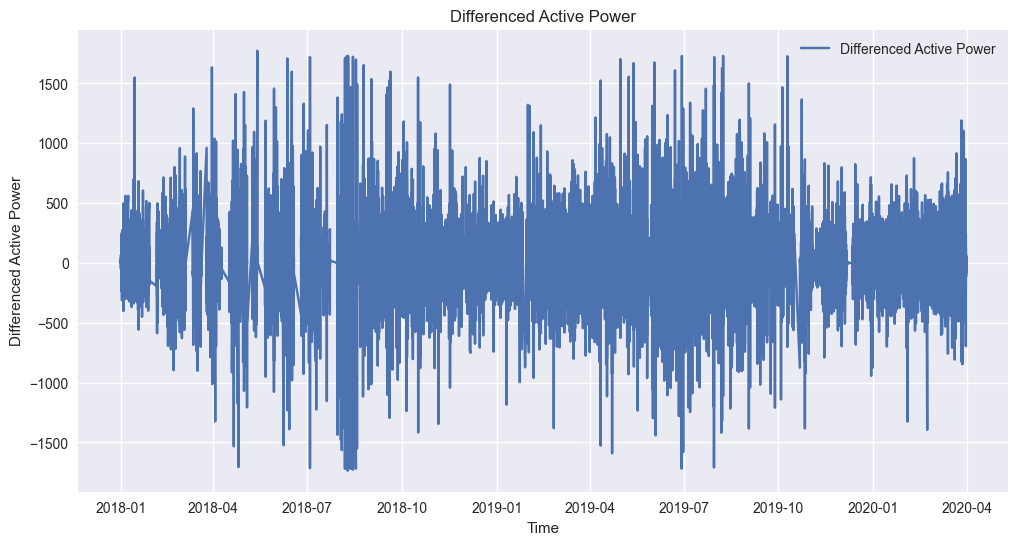

In [34]:
# Applying differentiation to the 'ActivePower' column

df['active_power_diff'] = df['ActivePower'].diff().dropna()

# Performing the ADF (Augmented Dickey-Fuller) test on the differenced series
# The ADF test checks for stationarity in the time series data.
result_adf = adfuller(df['active_power_diff'].dropna())

# Printing the ADF statistic and p-value for the differenced series

print('ADF Statistic (Differenced):', result_adf[0])
print('p-value (Differenced):', result_adf[1])

# Performing the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on the differenced series
# The KPSS test also checks for stationarity but has the null hypothesis that the series is stationary.
kpss_statistic, p_value, _, critical_values = kpss(df['active_power_diff'].dropna())

# Printing the KPSS statistic and p-value for the differenced series

print('KPSS Statistic (Differenced):', kpss_statistic)
print('p-value (Differenced):', p_value)

plt.figure(figsize=(12, 6))
# Plotting the differenced active power data
plt.plot(df['active_power_diff'], label='Differenced Active Power')
plt.title('Differenced Active Power')
plt.xlabel('Time')
plt.ylabel('Differenced Active Power')
plt.legend()
plt.show()

In [35]:
df.columns

Index(['ActivePower', 'BearingShaftTemperature', 'Blade1PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature',
       'GeneratorWinding1Temperature', 'HubTemperature', 'MainBoxTemperature',
       'ReactivePower', 'RotorRPM', 'WindSpeed', 'active_power_diff'],
      dtype='object')

In [36]:
# **a) Fitting the ARIMA model**
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split

# Using the chronological 80/20 split instead of random split
train_size = int(len(df) * 0.8)
df_train = df[:train_size]
df_test = df[train_size:]

model_arima = ARIMA(df_train['active_power_diff'].dropna(), order=(1, 1, 2))
model_arima_fit = model_arima.fit()

# **b) Fitting the Exponential Smoothing model**
model_exp = ExponentialSmoothing(df_train['active_power_diff'].dropna(), trend='add', seasonal='add', seasonal_periods=12)
model_exp_fit = model_exp.fit()

# **c) Preparing data for Random Forest using chronological split**
X_train = df_train.drop(columns=['ActivePower', 'active_power_diff'])  # Remove both target columns
y_train = df_train['ActivePower']

X_test = df_test.drop(columns=['ActivePower', 'active_power_diff'])    # Remove both target columns
y_test = df_test['ActivePower']

# Removing NaNs while maintaining the chronological order
# Remove rows with NaN values in features
train_mask = X_train.notna().all(axis=1)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = X_test.notna().all(axis=1)
X_test = X_test[test_mask]
y_test = y_test[test_mask]

# **d) Fitting the Random Forest model**
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# **e) Making predictions and evaluation**
# Predictions for ARIMA (forecast for the length of test set)
y_pred_arima = model_arima_fit.forecast(steps=len(y_test))

# Predictions for Exponential Smoothing (forecast for the length of test set)
y_pred_exp = model_exp_fit.forecast(steps=len(y_test))

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max

In [37]:
# **Model Evaluation**

# Function to calculate error metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)  # Calculate Mean Absolute Error
    mse = mean_squared_error(y_true, y_pred)   # Calculate Mean Squared Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Calculate Root Mean Squared Error
    r2 = r2_score(y_true, y_pred)               # Calculate R² Score
    print(f"{model_name} Performance:")          # Print the model name
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}\n")  # Print the metrics

# Evaluating the ARIMA model
evaluate_model(y_test, y_pred_arima, "ARIMA")

# Evaluating the Exponential Smoothing model
evaluate_model(y_test, y_pred_exp, "Exponential Smoothing")

# Evaluating the Random Forest model
evaluate_model(y_test, y_pred_rf, "Random Forest")

ARIMA Performance:
MAE: 473.7440, MSE: 442716.5452, RMSE: 665.3695, R²: -1.0127

Exponential Smoothing Performance:
MAE: 465.6174, MSE: 430014.4489, RMSE: 655.7549, R²: -0.9549

Random Forest Performance:
MAE: 19.7377, MSE: 10745.2343, RMSE: 103.6592, R²: 0.9512

